In [1]:
# TP 2 - Options américaines (reprendre le TP2 au début)

import numpy as np

n = 50 # nombre d'étapes
T = 10 # temps final
deltat = T/n # pas de temps
S0 = 120 # prix initial
sigma = 0.1 # volatilité
up = np.exp(sigma*np.sqrt(deltat)) # up
down = 1/up # down

# taux d'intérêt et facteur d'actualisation
r = 0.01
R = np.exp(r*deltat)

# probabilité risque neutre
p = (R-down)/(up-down)

print("p =",p)

p = 0.5111971192213101


In [2]:
# matrice des prix de l'actif (TP1)
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [3]:
S = CRR(n,down,up,S0)
S

array([[ 120.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 114.75166782,  125.48837218,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 109.73287723,  120.        ,  131.22776294, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  14.02535109,   15.33762874,   16.77268923, ..., 1026.71226593,
           0.        ,    0.        ],
       [  13.41193691,   14.66682065,   16.03911719, ...,  981.80787408,
        1073.67042458,    0.        ],
       [  12.82535108,   14.02535109,   15.33762874, ...,  938.86742526,
        1026.71226593, 1122.77628199]])

In [4]:
# paramètres de l'option
K = S0 # strike (ici, option à la "monnaie")

def payoffcall(S,K):
    phicall = max(S-K,0) # option d'achat
    return phicall

def payoffput(S,K):
    phiput = max(K-S,0) # option de vente
    return phiput


In [5]:
# évaluation du prix d'un call européen par récurrence rétrograde
C = np.zeros((n+1,n+1))
for j in range(n+1):
    C[n,j] = payoffcall(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        C[i,j] = (p*C[i+1,j+1]+(1-p)*C[i+1,j])/R


In [6]:
print("La prime du contrat call européen vaut C0 =",C[0,0])

La prime du contrat call européen vaut C0 = 20.69895792214137


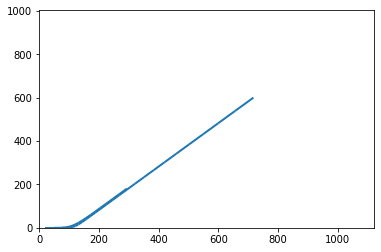

In [7]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],C[i,j]),(S[i,j+1],C[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [8]:
# évaluation du prix d'un call américain par récurrence rétrograde
CA = np.zeros((n+1,n+1))
for j in range(n+1):
    CA[n,j] = payoffcall(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        CA[i,j] = max(payoffcall(S[i,j],K),(p*CA[i+1,j+1]+(1-p)*CA[i+1,j])/R)


In [9]:
print("La prime du contrat call américain vaut CA0 =",CA[0,0])

La prime du contrat call américain vaut CA0 = 20.69895792214137


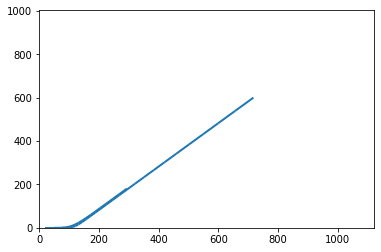

In [10]:
# on représente l'option américaine en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],CA[i,j]),(S[i,j+1],CA[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [11]:
# put européen
P = np.zeros((n+1,n+1))
for j in range(n+1):
    P[n,j] = payoffput(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        P[i,j] = (p*P[i+1,j+1]+(1-p)*P[i+1,j])/R

# put américain
PA = np.zeros((n+1,n+1))
for j in range(n+1):
    PA[n,j] = payoffput(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        PA[i,j] = max(payoffput(S[i,j],K),(p*PA[i+1,j+1]+(1-p)*PA[i+1,j])/R)


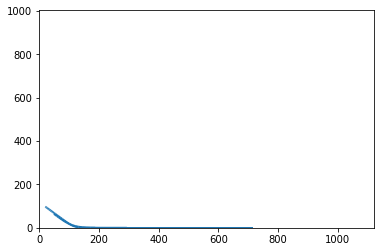

In [12]:
# on représente le put européen en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],P[i,j]),(S[i,j+1],P[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


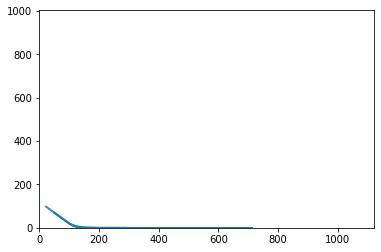

In [13]:
# on représente le put américain en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],PA[i,j]),(S[i,j+1],PA[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [14]:
print('Les primes sont: call européen:',C[0,0],' - call américain:',CA[0,0])
print('Les primes sont: put européen:',P[0,0],' - put américain:',PA[0,0])

Les primes sont: call européen: 20.69895792214137  - call américain: 20.69895792214137
Les primes sont: put européen: 9.27944808645637  - put américain: 10.67632975079825


In [15]:
# frontière d'exercice du put américain
EPA = np.ones((n+1,n+1)) # 0 si on attend, 1 si on exerce
for j in range(n+1):
    if S[n,j]<=K:
        EPA[n,j]=1
    else:
        EPA[n,j]=-1
for i in range(n-1,-1,-1):
    for j in range(i+1):
        if (p*PA[i+1,j+1]+(1-p)*P[i+1,j])>=payoffput(S[i,j],K):
            EPA[i,j]=-1
        else:
            EPA[i,j]=1



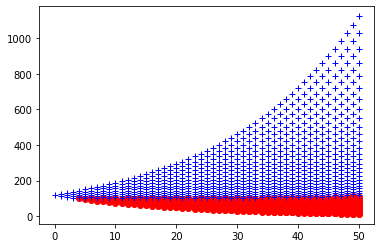

In [16]:
for i in range(n+1):
    for j in range(i+1):
        if EPA[i,j]==1:
            plt.plot(i,S[i,j],'ro')
        else:
            plt.plot(i,S[i,j],'b+')

In [17]:
# recherche de la frontière
F = np.zeros(n+1) # prix correspondant à l'indice maximal de la zone rouge
for i in range(n+1):
    prixrouge = S[i,[j for j in range(n+1) if EPA[i,j]==1]] # prix de la zone rouge
    if prixrouge.size>0:
        F[i] = np.amax(prixrouge) # on récupère le prix max des rouges
F

array([  0.        ,   0.        ,   0.        ,   0.        ,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288,  95.95553864,
       100.34420288,  95.95553864, 100.34420288, 104.93358898,
       100.34420288, 104.93358898, 100.34420288, 104.93358898,
       100.34420288, 104.93358898, 100.34420288, 104.93358898,
       100.34420288, 104.93358898, 109.73287723, 104.93358898,
       109.73287723, 114.75166782, 109.73287723])

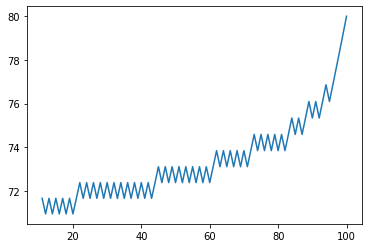

In [31]:
# on dessine la frontière rouge
indice = np.amin(np.nonzero(F)) # indice temporel du début de la zone rouge
plt.plot(range(indice,n+1),F[indice:n+1])
plt.show()